In [44]:
import pandas as pd
import numpy as np
import scipy.stats
import statistics
from scipy import stats
from scipy.stats import norm, kurtosis, normaltest, chisquare, kstest, ks_2samp, mannwhitneyu, ttest_ind
import matplotlib.pyplot as plt

In [45]:
df = pd.read_excel('C:\\Users\\User\\Downloads\\ms-data1 (2).xlsx', sheet_name = '2')

In [46]:
df.head()

,one,two,three,four,five,six,seven
0,-16.427992,10.337568,10.094972,12.235925,10,16,-2.336080
1,-29.368694,20.601542,15.573639,12.159321,6,15,5.041232
2,-6.561724,1.876631,2.625150,24.552468,10,14,6.987623
3,7.358867,17.243398,15.855155,12.348476,9,14,9.542421
4,6.692038,-23.179041,11.742064,19.597243,9,15,11.116361


## Проведём предварительный анализ, включающий:
* оценку числовых характеристик (по 2 в каждой из групп; оформить в виде таблицы);
* графический анализ;
* предварительное заключение о законе распределения каждой случайной величины;

In [47]:
df.describe()

,one,two,three,four,five,six,seven
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-10.356208,8.813767,8.815445,12.626233,8.392000,12.114000,7.921503
std,13.584549,18.327286,13.410601,6.991504,1.627154,3.368635,3.833575
min,-33.870846,-49.504520,-28.674916,-7.461513,3.000000,3.000000,-5.948884
25%,-22.278191,-3.051858,-0.717933,7.874639,7.000000,10.000000,5.430496
50%,-9.587024,8.710024,8.947190,12.756511,8.000000,12.000000,7.737115
75%,1.684851,20.505862,18.168010,17.091330,10.000000,14.000000,10.567242
max,11.894711,62.953554,51.361200,35.343018,12.000000,26.000000,20.426754


In [48]:
specifications = df.describe().loc[['mean','std','50%'],:]
scope_variation = df.max() - df.min()
for unique in specifications:
    # Дисперсия
    specifications.loc['variance', unique] = df[unique].var()
    # Размах вариации
    specifications.loc['scope_variation', unique] = scope_variation[unique]
    # Коэффициент эксцесса
    specifications.loc['kurtosis', unique] =  scipy.stats.kurtosis(df[unique], fisher = True)
    # Моду
    specifications.loc['mode', unique] =  df[unique].value_counts(ascending = False).head(1).index[0]
    # Коэффициент асимметрии
    specifications.loc['skewness', unique] = df[unique].skew()

    
specifications

,one,two,three,four,five,six,seven
mean,-10.356208,8.813767,8.815445,12.626233,8.392000,12.114000,7.921503
std,13.584549,18.327286,13.410601,6.991504,1.627154,3.368635,3.833575
50%,-9.587024,8.710024,8.947190,12.756511,8.000000,12.000000,7.737115
variance,184.539975,335.889412,179.844218,48.881130,2.647631,11.347699,14.696298
scope_variation,45.765557,112.458074,80.036116,42.804531,9.000000,23.000000,26.375637
kurtosis,-1.246367,0.287275,-0.229775,0.027581,-0.343639,0.354309,0.301399
mode,-18.815943,-23.627036,8.427380,21.798782,9.000000,12.000000,7.971697
skewness,-0.071841,-0.039024,-0.043146,0.152514,-0.188596,0.393697,0.016815


In [49]:
df.columns

Index(['one', 'two', 'three', 'four', 'five', 'six', 'seven'], dtype='object')

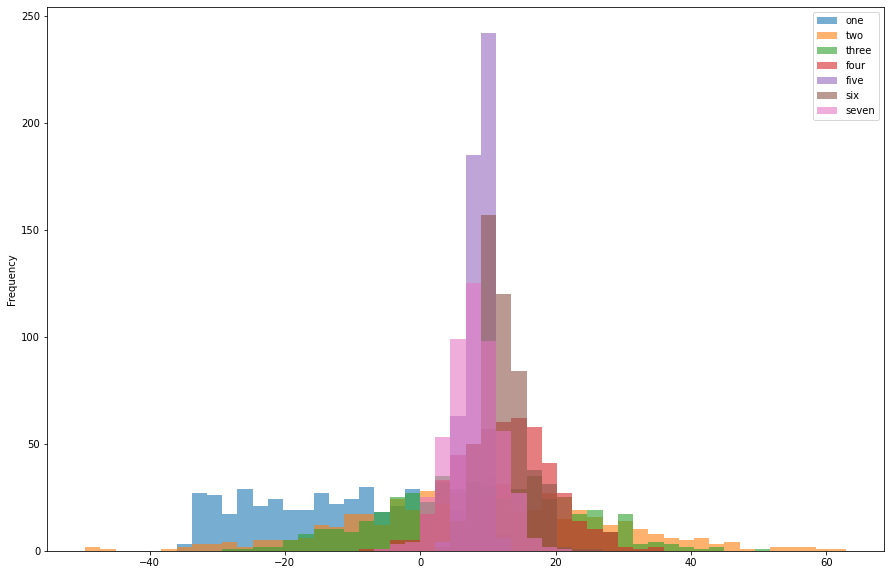

In [50]:
df.plot(kind = 'hist', figsize = (15, 10), bins = 50, alpha = 0.6);

<AxesSubplot:>

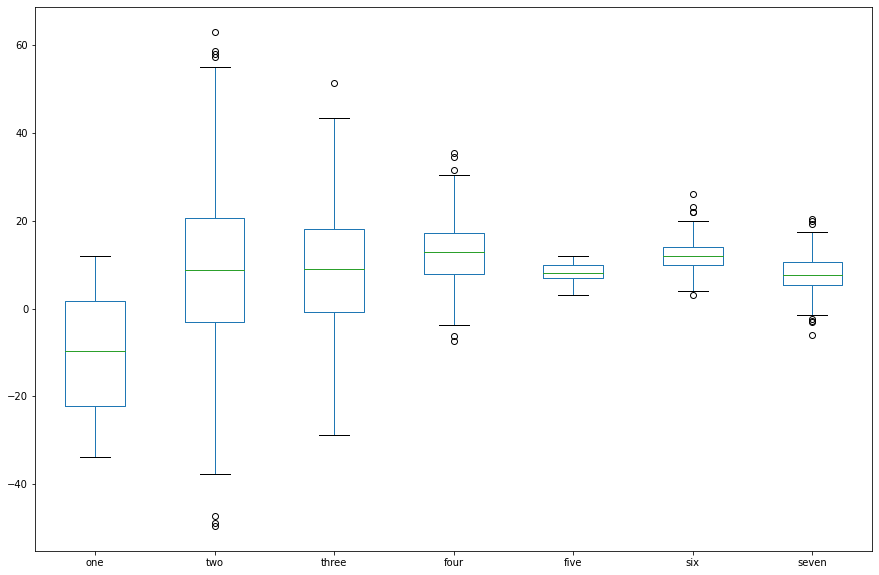

In [51]:
df.plot(kind = 'box', figsize = (15, 10))

<AxesSubplot:ylabel='Density'>

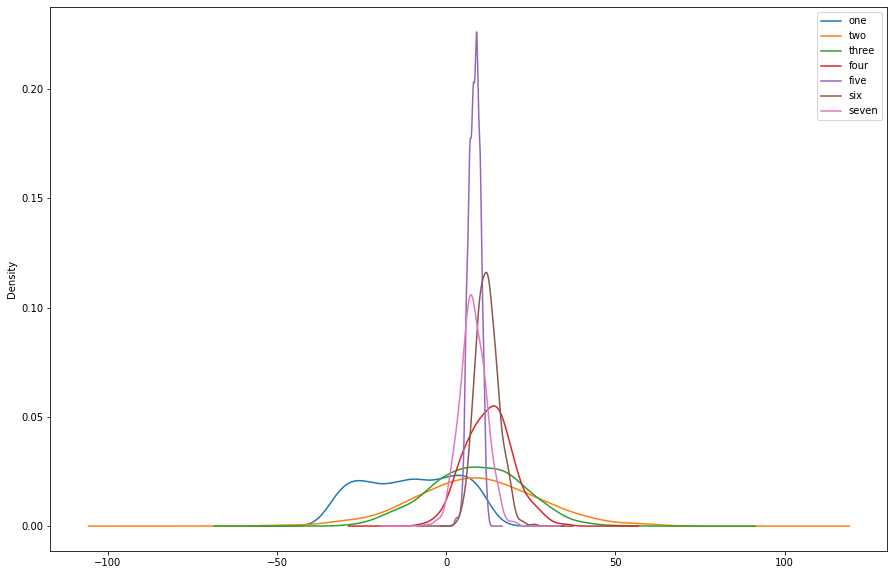

In [52]:
df.plot(kind = 'kde', figsize = (15, 10))

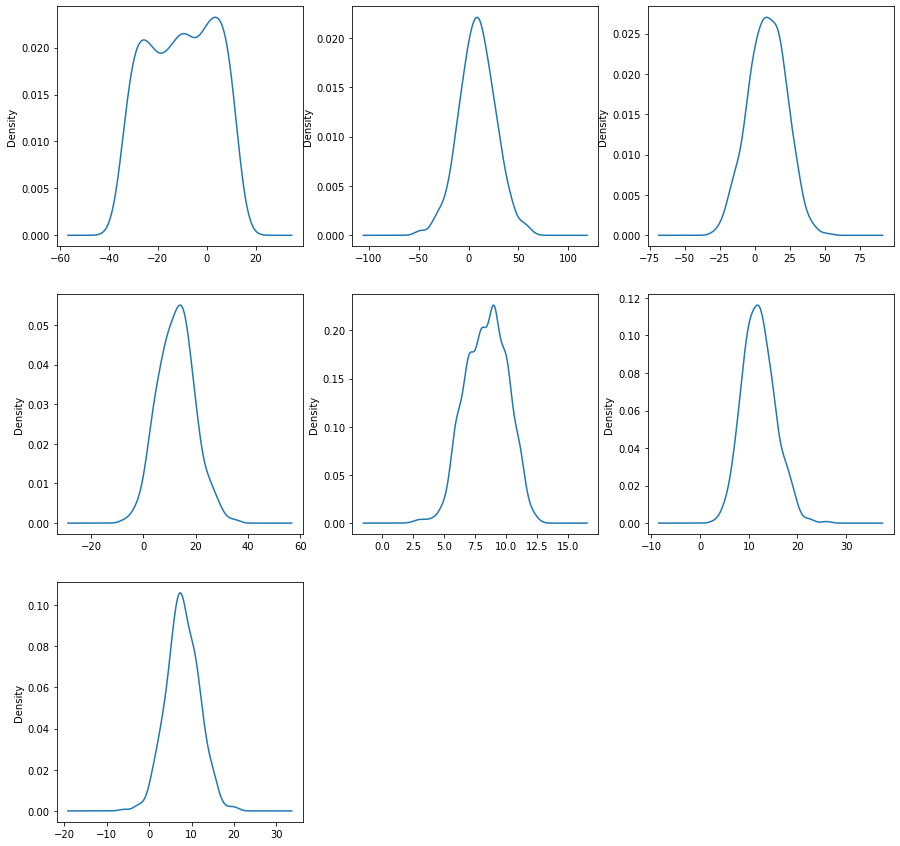

In [53]:
columns_name = list(df.columns)
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
for i in range(len(columns_name)):
    plt.subplot(3, 3, i+1)
    df.loc[:, columns_name[i]].plot( kind ='kde' , figsize = (15,15));

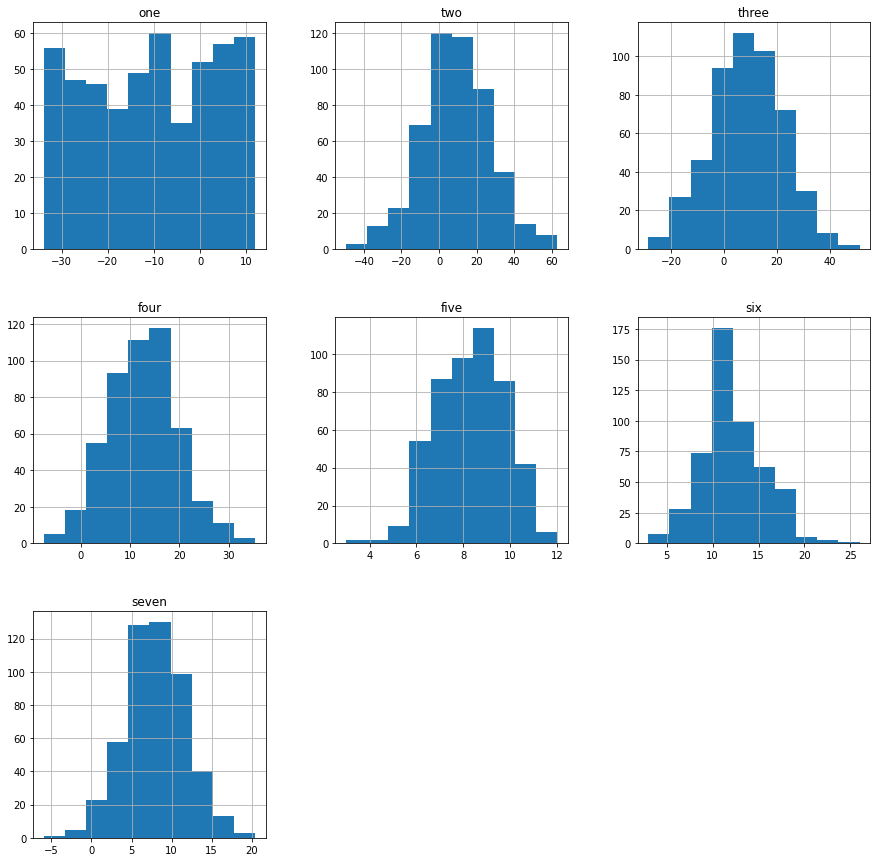

In [54]:
df.hist(figsize = (15,15));

 ### Провести проверку на выбросы. В случае выброса – повторить п.1, дополнить таблицу. 

In [55]:
def scope_quartile (data,atribut):
    per_cent_75 = data[atribut].describe()['75%']
    per_cent_25 = data[atribut].describe()['25%']
    return (per_cent_75 - per_cent_25)

In [56]:
def delete(data,colms):
    data.plot(figsize = (15,10), kind = 'box', title ="Boxplot распределений до преобразований");
    for atribut in colms:
        per_cent_75 = data[atribut].describe()['75%']
        per_cent_50 = data[atribut].describe()['50%']
        per_cent_25 = data[atribut].describe()['25%']
        scope = scope_quartile (data,atribut)
        data = data[ (data[atribut] > per_cent_25 - scope)
                   & (data[atribut] < per_cent_75 + scope)]
    data.plot(kind = 'box', figsize = (15, 10), title ="Boxplot распределений после преобразований")
    return data
#df.plot(kind = 'box', figsize = (15, 10))
#fig.suptitle('"Boxplot" по выборкам');

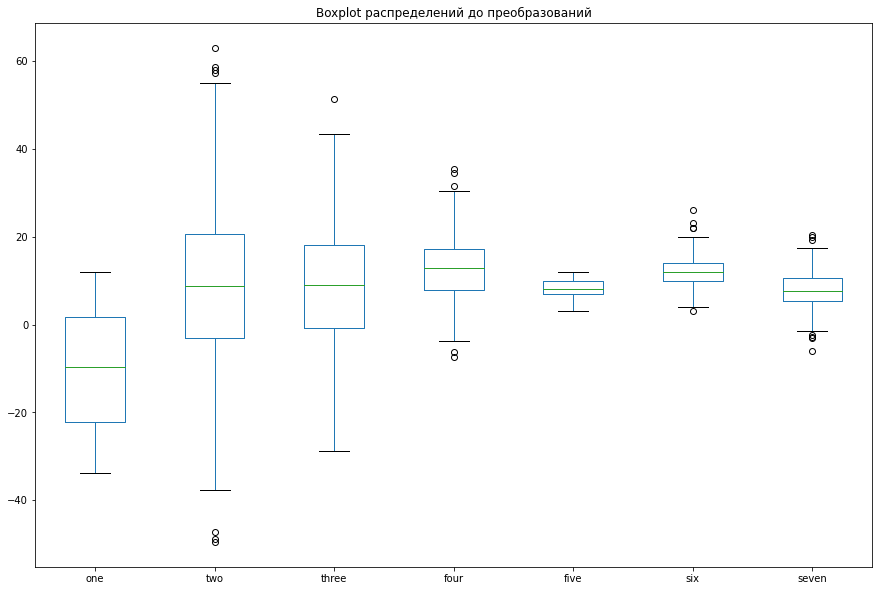

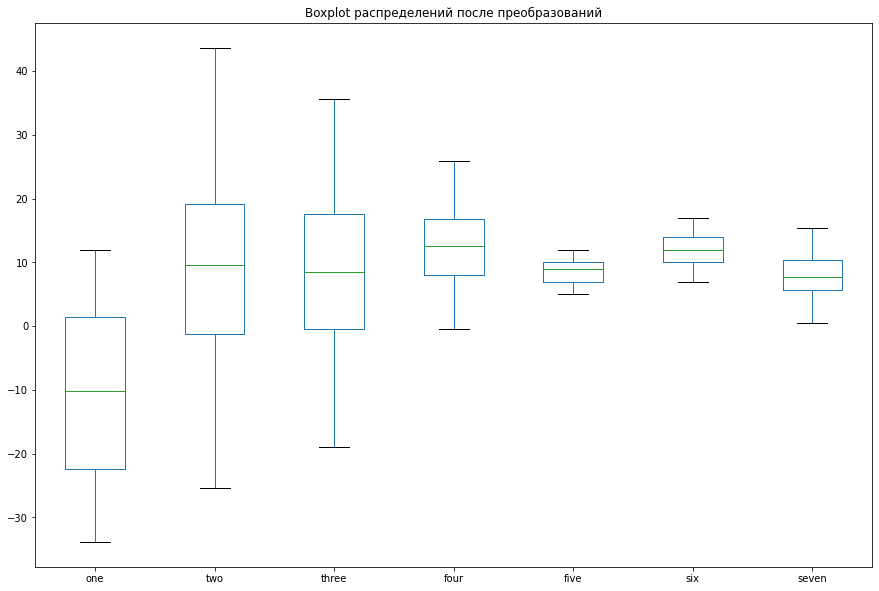

In [57]:
ndf = delete(df, columns_name);

In [58]:
specifications

,one,two,three,four,five,six,seven
mean,-10.356208,8.813767,8.815445,12.626233,8.392000,12.114000,7.921503
std,13.584549,18.327286,13.410601,6.991504,1.627154,3.368635,3.833575
50%,-9.587024,8.710024,8.947190,12.756511,8.000000,12.000000,7.737115
variance,184.539975,335.889412,179.844218,48.881130,2.647631,11.347699,14.696298
scope_variation,45.765557,112.458074,80.036116,42.804531,9.000000,23.000000,26.375637
kurtosis,-1.246367,0.287275,-0.229775,0.027581,-0.343639,0.354309,0.301399
mode,-18.815943,-23.627036,8.427380,21.798782,9.000000,12.000000,7.971697
skewness,-0.071841,-0.039024,-0.043146,0.152514,-0.188596,0.393697,0.016815


In [59]:
ndf.describe()

,one,two,three,four,five,six,seven
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,-10.454118,9.017046,8.457106,12.390166,8.438692,11.784741,7.888809
std,13.512643,14.752012,12.164316,5.960385,1.554449,2.585159,3.329161
min,-33.870846,-25.425148,-18.881332,-0.467858,5.000000,7.000000,0.522971
25%,-22.352947,-1.240840,-0.377677,8.018227,7.000000,10.000000,5.618311
50%,-10.144353,9.641837,8.447406,12.649140,9.000000,12.000000,7.675751
75%,1.446547,19.245938,17.636850,16.836534,10.000000,14.000000,10.424479
max,11.894711,43.668024,35.701656,25.978079,12.000000,17.000000,15.442213


In [60]:
nspecifications = ndf.describe().loc[['mean','std','50%'],:]
scope_variation = ndf.max() - ndf.min()
for unique in nspecifications:
    # Дисперсия
    nspecifications.loc['variance', unique] = ndf[unique].var()
    # Размах вариации
    nspecifications.loc['scope_variation', unique] = scope_variation[unique]
    # Коэффициент эксцесса
    nspecifications.loc['kurtosis', unique] =  scipy.stats.kurtosis(ndf[unique], fisher = True)
    # Моду
    nspecifications.loc['mode', unique] =  ndf[unique].value_counts(ascending = False).head(1).index[0]
    # Коэффициент асимметрии
    nspecifications.loc['skewness', unique] = ndf[unique].skew()

    
nspecifications

,one,two,three,four,five,six,seven
mean,-10.454118,9.017046,8.457106,12.390166,8.438692,11.784741,7.888809
std,13.512643,14.752012,12.164316,5.960385,1.554449,2.585159,3.329161
50%,-10.144353,9.641837,8.447406,12.649140,9.000000,12.000000,7.675751
variance,182.591511,217.621853,147.970583,35.526184,2.416313,6.683045,11.083315
scope_variation,45.765557,69.093171,54.582988,26.445937,7.000000,10.000000,14.919242
kurtosis,-1.231501,-0.520949,-0.661972,-0.668627,-0.776876,-0.713761,-0.553477
mode,-8.931425,-2.310410,8.427380,15.535146,9.000000,12.000000,7.971697
skewness,-0.071542,-0.028961,-0.072106,0.039554,-0.102313,0.102758,0.031107


In [61]:
#Тест Шапиро-Уилка проверяет нулевую гипотезу о том, что данные были взяты из нормального распределения.
#Тест Андерсона-Дарлинга для данных, поступающих из определенного распределения.
#Тест Эта функция проверяет нулевую гипотезу о том, что выборка происходит из нормального распределения. Он основан на тесте Д'Агостино и Пирсона [1] , [2], который сочетает перекос и эксцесс для создания комплексного теста на нормальность.
#Тест хи-квадрат проверяет нулевую гипотезу о том, что категориальные данные имеют заданные частоты.
#Тест Выполняет (один или два образца) тест Колмогорова-Смирнова на соответствие нормальному распределению.
#Тест Выполняет (один или два образца) тест Колмогорова-Смирнова на соответствие равномерному распределению.
table_distributions = pd.DataFrame(columns=['Параметры закона распр','Шапиро-Уилка', 'Андерсона-Дарлинга', 'Хи-квадрат нормальность', 'Хи-квадрат равномерность','Колмогорова-Смирнова нормальному распределению', 'Колмогорова-Смирнова  равномерному распределению']) 
i = 0

for atribut in columns_name:
    andr = 1
    i += 1
    alpha = 0.05
    print('ВЫБОРКА' + str(i))
    
    table_distributions.loc[atribut, 'Параметры закона распр'] = str('mean = ' +  str(round(nspecifications[atribut]['mean'],2)) +
                                         ', std = ' + str(round(nspecifications[atribut]['std'],2)))
    
    stat, p = scipy.stats.shapiro(ndf[atribut])
    print('Тест Шапиро-Уилка Statistics=%.3f, p-value=%.3f' % (stat, p))
    if p > alpha:
        print('Принять гипотезу о нормальности')
        table_distributions.loc[atribut, 'Шапиро-Уилка'] = 'H0'
    else:
        print('Отклонить гипотезу о нормальности')
        table_distributions.loc[atribut, 'Шапиро-Уилка'] = 'H1'
        
    stat = scipy.stats.anderson(ndf[atribut])
    print('Тест Андерсона-Дарлинга Statistics=%.3f, crit=%.3f' % (stat[0], stat[1][0]))
    for cr in stat[1]:
        if stat[0] > cr:
            andr =  0;
    if andr:
        print('Принять гипотезу о нормальности')
        table_distributions.loc[atribut, 'Андерсона-Дарлинга'] = 'H0'
    else:
        print('Отклонить гипотезу о нормальности')
        table_distributions.loc[atribut, 'Андерсона-Дарлинга'] = 'H1'
    
    
    stat, p = normaltest(ndf[atribut])
    print('Тест хи-квадрат нормальность Statistics=%.3f, p=%.3f' % (stat, p, ))
    if p > 0.01:
        print('Принять гипотезу о нормальности')
        table_distributions.loc[atribut, 'Хи-квадрат нормальность'] = 'H0'
    else:
        print('Отклонить гипотезу о нормальности')
        table_distributions.loc[atribut, 'Хи-квадрат нормальность'] = 'H1'
        
    stat, p = chisquare(ndf[atribut])
    print('Тест хи-квадрат равномерность Statistics=%.3f, p=%.3f' % (stat, p))
    print(stat)
    if p > 0.05:
        print('Принять гипотезу о равномерности')
        table_distributions.loc[atribut, 'Хи-квадрат равномерность'] = 'H0'
    else:
        print('Отклонить гипотезу о равномерности')
        table_distributions.loc[atribut, 'Хи-квадрат равномерность'] = 'H1'
        
    stat, p = scipy.stats.kstest(ndf[atribut], 'norm', args = (nspecifications[atribut]['mean'],nspecifications[atribut]['std']))
    print('Тест Колмогорова-Смирнова Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Принять гипотезу о нормальности')
        table_distributions.loc[atribut, 'Колмогорова-Смирнова нормальному распределению'] = 'H0'
    else:
        print('Отклонить гипотезу о нормальности')
        table_distributions.loc[atribut, 'Колмогорова-Смирнова нормальному распределению'] = 'H1'
        
    stat, p = scipy.stats.kstest(ndf[atribut], 'uniform', args = (nspecifications[atribut]['mean'],nspecifications[atribut]['std']))
    print('Тест Колмогорова-Смирнова Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Принять гипотезу о равномерности')
        table_distributions.loc[atribut, 'Колмогорова-Смирнова  равномерному распределению'] = 'H0'
    else:
        print('Отклонить гипотезу о равномерности')
        table_distributions.loc[atribut, 'Колмогорова-Смирнова  равномерному распределению'] = 'H1'
        
    stat, p = scipy.stats.kstest(ndf[atribut], 'poisson', args = (nspecifications[atribut]['mean'],nspecifications[atribut]['std']))
    print('Тест Колмогорова-Смирнова Пуасон Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Принять гипотезу о равномерности')
        table_distributions.loc[atribut, 'Колмогорова-Смирнова  Пуасон'] = 'H0'
    else:
        print('Отклонить гипотезу о равномерности')
        table_distributions.loc[atribut, 'Колмогорова-Смирнова  Пуасон'] = 'H1'
        
    print()

ВЫБОРКА1
Тест Шапиро-Уилка Statistics=0.948, p-value=0.000
Отклонить гипотезу о нормальности
Тест Андерсона-Дарлинга Statistics=4.858, crit=0.570
Отклонить гипотезу о нормальности
Тест хи-квадрат нормальность Statistics=264.283, p=0.000
Отклонить гипотезу о нормальности
Тест хи-квадрат равномерность Statistics=-6392.552, p=1.000
-6392.552060616944
Принять гипотезу о равномерности
Тест Колмогорова-Смирнова Statistics=0.078, p=0.022
Отклонить гипотезу о нормальности
Тест Колмогорова-Смирнова Statistics=0.493, p=0.000
Отклонить гипотезу о равномерности
Тест Колмогорова-Смирнова Пуасон Statistics=nan, p=nan
Отклонить гипотезу о равномерности

ВЫБОРКА2
Тест Шапиро-Уилка Statistics=0.993, p-value=0.113
Принять гипотезу о нормальности
Тест Андерсона-Дарлинга Statistics=0.353, crit=0.570
Принять гипотезу о нормальности
Тест хи-квадрат нормальность Statistics=6.971, p=0.031
Принять гипотезу о нормальности
Тест хи-квадрат равномерность Statistics=8833.226, p=0.000
8833.225533577657
Отклонить гип

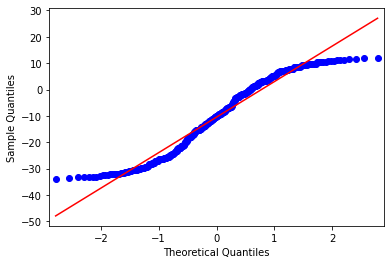

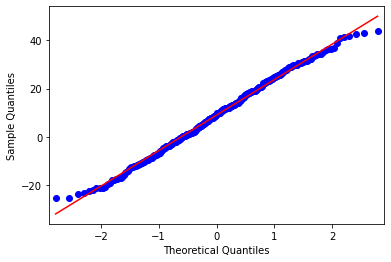

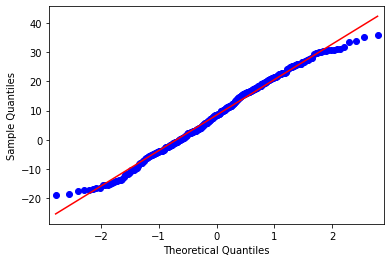

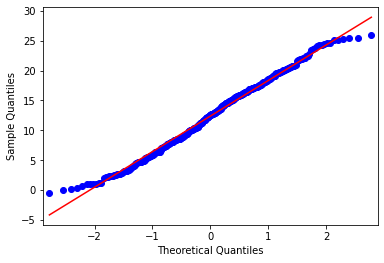

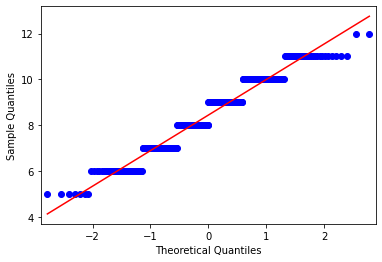

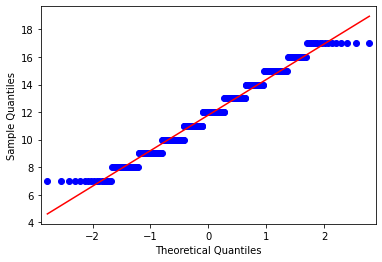

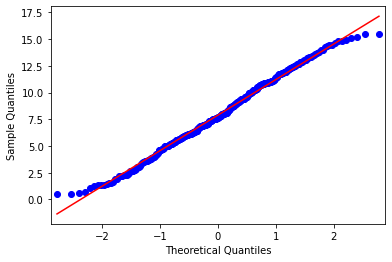

In [62]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
#ArithmeticError seed(1)
# generate univariate observations
# data = 5 * randn(100) + 50
# q-q plot
for atribut in columns_name:
    qqplot(ndf[atribut], line='s')
    pyplot.show()

In [63]:
table_distributions

,Параметры закона распр,Шапиро-Уилка,Андерсона-Дарлинга,Хи-квадрат нормальность,Хи-квадрат равномерность,Колмогорова-Смирнова нормальному распределению,Колмогорова-Смирнова равномерному распределению,Колмогорова-Смирнова Пуасон
one,"mean = -10.45, std = 13.51",H1,H1,H1,H0,H1,H1,H1
two,"mean = 9.02, std = 14.75",H0,H0,H0,H1,H0,H1,H1
three,"mean = 8.46, std = 12.16",H1,H1,H1,H1,H0,H1,H1
four,"mean = 12.39, std = 5.96",H1,H1,H1,H1,H0,H1,H1
five,"mean = 8.44, std = 1.55",H1,H1,H1,H0,H1,H1,H1
six,"mean = 11.78, std = 2.59",H1,H1,H1,H0,H1,H1,H1
seven,"mean = 7.89, std = 3.33",H1,H0,H0,H1,H0,H1,H1


### Провести проверку: можно ли в качестве оценки математического ожидания использовать округленное до целого среднее значение? 

In [64]:
two = df[columns_name[1]].reset_index(drop=True).dropna()
mu  = round(two.mean())
sigma = 2.88
print('p-value =',stats.kstest(two, 'norm', args = (mu,sigma))[1])

p-value = 2.3504706042420752e-57


# p-value остался ниже уровня значимости, а значит в качестве оценки мат. ожидания нельзя использовать округленное до целого среднее значение

### Для нормально распределенных случайных величин проверить: µ1=µ2; D1=D2
D - дисперсия

In [65]:
table_uniformity = pd.DataFrame(columns=['N ст1', 'N ст2', 'мю1=мю2', 'D1=D2',
                                         'Критерий К.-С.', 'Ранговый кр.'])

In [66]:
ncolumns_name = [columns_name[1], columns_name[3], columns_name[4]]

In [67]:
i = 0
for n in ncolumns_name:
    for nn in ncolumns_name:
        if n != nn and n < nn:
            res = stats.fligner(ndf[n],ndf[nn])
            print(f'p-value для {n} и {nn} = {res[1]}')
            if res[1] > 0.01:
                table_uniformity.loc[i,'D1=D2'] = True
            else :
                table_uniformity.loc[i,'D1=D2'] = False

p-value для four и two = 4.5330929895077826e-38
p-value для five и two = 7.386513205219138e-83
p-value для five и four = 7.514607381282479e-62


In [68]:
# Т критерий Стьюдента для выборок с средних значений
i = 0
for n in ncolumns_name:
    for nn in ncolumns_name:
        if n != nn and n < nn:
            if ttest_ind(ndf[n], ndf[nn], equal_var = False)[1] > 0.01:
                table_uniformity.loc[i,'мю1=мю2'] = True
            else :
                table_uniformity.loc[i,'мю1=мю2'] = False
            i+=1


### Проверить однородность тех же (п. 3) выборок, используя критерии
- Колмогорова-Смирнова,
- Мана-Уитни или Уилкоксона

In [69]:
i = 0
for n in ncolumns_name:
    for nn in ncolumns_name:
        if n != nn and n < nn:
            if ks_2samp(ndf[n], ndf[nn])[1] > 0.01:
                table_uniformity.loc[i,'Критерий К.-С.'] = 'H0'
            else :
                table_uniformity.loc[i,'Критерий К.-С.'] = 'H1'
            i+=1


In [70]:
i = 0
for n in ncolumns_name:
    for nn in ncolumns_name:
        if n != nn and n < nn:
            if mannwhitneyu(ndf[n], ndf[nn])[1] > 0.01:
                table_uniformity.loc[i,'Ранговый кр.'] = 'H0'
            else :
                table_uniformity.loc[i,'Ранговый кр.'] = 'H1'
            table_uniformity.loc[i,'N ст1'] = n
            table_uniformity.loc[i,'N ст2'] = nn
            i+=1


In [71]:
table_uniformity

,N ст1,N ст2,мю1=мю2,D1=D2,Критерий К.-С.,Ранговый кр.
0,four,two,False,False,H1,H1
1,five,two,True,NaN,H1,H0
2,five,four,False,NaN,H1,H1
